# Load Packages

In [30]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
import gc; gc.enable()
sns.set()
pd.set_option("display.max_columns",None)

In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rileyjefferson/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Load
- Analyze english tweets with Vader Sentiment Analysis

In [5]:
df = pd.read_csv('../fw_full.csv',low_memory=False)

In [36]:
df = df[df['lang']=='en']
df.reset_index(drop=True,inplace=True)

In [37]:
df.head(3)

,user_id,status_id,created_at,created_at.1,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favorite_count,retweet_count,hashtags,symbols,urls_url,urls_t.co,urls_expanded_url,media_url,media_t.co,media_expanded_url,media_type,ext_media_url,ext_media_t.co,ext_media_expanded_url,ext_media_type,mentions_user_id,mentions_screen_name,lang,quoted_status_id,quoted_text,quoted_created_at,quoted_source,quoted_favorite_count,quoted_retweet_count,quoted_user_id,quoted_screen_name,quoted_name,quoted_followers_count,quoted_friends_count,quoted_statuses_count,quoted_location,quoted_description,quoted_verified,retweet_status_id,retweet_text,retweet_created_at,retweet_source,retweet_favorite_count,retweet_retweet_count,retweet_user_id,retweet_screen_name,retweet_name,retweet_followers_count,retweet_friends_count,retweet_statuses_count,retweet_location,retweet_description,retweet_verified,place_url,place_name,place_full_name,place_type,country,country_code,geo_coords,coords_coords,bbox_coords,status_url,name,location,description,url,protected,followers_count,friends_count,listed_count,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
0,x538238041,x1130947670040883200,2019-05-21 21:25,9:25:00 PM,7KingdomsRMine,@ellariasnake *swoops in and hugs forever*,Twitter for Android,28,x1130947259846127616,x2466814554,ellariasnake,False,False,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x2466814554,ellariasnake,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA NA,NA NA,NA NA NA NA NA NA NA NA,https://twitter.com/7KingdomsRMine/status/1130...,Vissie III of the House Targaryen,The seven hells,Fabulous dead king. Don't hate me because I wo...,https://t.co/Aet5yhXkVA,False,10638,326,62,43773,13547,2012-03-27 15:17,False,https://t.co/Aet5yhXkVA,http://vissie4king.com,NaN,https://pbs.twimg.com/profile_banners/53823804...,http://abs.twimg.com/images/themes/theme4/bg.gif,http://pbs.twimg.com/profile_images/7997334059...
1,x538238041,x1130578559242821632,2019-05-20 20:58,8:58:00 PM,7KingdomsRMine,@danygonebad @MaekarTarg *brings the gin tonic*,Twitter for Android,22,x1130577205225033733,x607150882,danygonebad,False,False,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x607150882 x890587538473267200,danygonebad MaekarTarg,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA NA,NA NA,NA NA NA NA NA NA NA NA,https://twitter.com/7KingdomsRMine/status/1130...,Vissie III of the House Targaryen,The seven hells,Fabulous dead king. Don't hate me because I wo...,https://t.co/Aet5yhXkVA,False,10638,326,62,43773,13547,2012-03-27 15:17,False,https://t.co/Aet5yhXkVA,http://vissie4king.com,NaN,https://pbs.twimg.com/profile_banners/53823804...,http://abs.twimg.com/images/themes/theme4/bg.gif,http://pbs.twimg.com/profile_images/7997334059...
2,x538238041,x1130578318422663169,2019-05-20 20:57,8:57:00 PM,7KingdomsRMine,@Sunspear_Snake A mere spot of bother for my n...,Twitter for Android,36,x1130573147420254208,x750065186380406785,Sunspear_Snake,False,False,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x750065186380406785,Sunspear_Snake,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA NA,NA NA,NA NA NA NA NA NA NA NA,https://twitter.com/7KingdomsRMine/status/1130...,Vissie III of the House Targaryen,The seven hells,Fabulous dead king. Don't hate me because I wo...,https://t.co/Aet5yhXkVA,False,10638,326,62,43773,13547,2012-03-27 15:17,False,https://t.co/Aet5yhXkVA,http://vissie4king.com,NaN,https://pbs.twimg.com/profile_banners/53823804...,http://abs.twimg.com/images/themes/them

# Tweet Length Distribution

In [38]:
tweets = pd.DataFrame(df['text'])

In [39]:
tweets['text'].apply(len).describe()

count    33532.000000
mean       109.438596
std         72.443352
min          4.000000
25%         59.000000
50%         88.000000
75%        138.000000
max       1914.000000
Name: text, dtype: float64

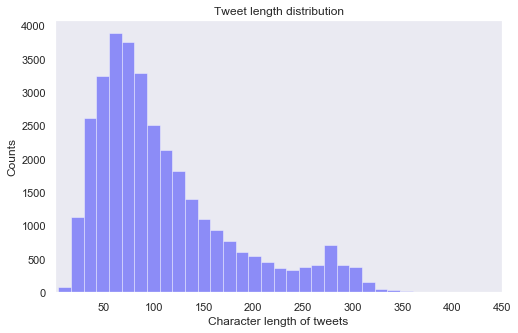

In [40]:
text_lens = tweets['text'].apply(len).values
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
g = sns.distplot(text_lens, kde=False, bins=150, color='blue')
g.set_xlabel('Character length of tweets')
g.set_ylabel('Counts')
g.set_title('Tweet length distribution')
ax.set_xlim(1,450)
ax.grid(False)
plt.show()

# Wordcloud

In [41]:
# remove noise (links)
tweets['text'] = tweets['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [42]:
# Collate the tweets into a larger one
tweets_concat = " ".join(tweet for tweet in tweets['text'])
stopwords = set(STOPWORDS)

In [43]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(tweets_concat)

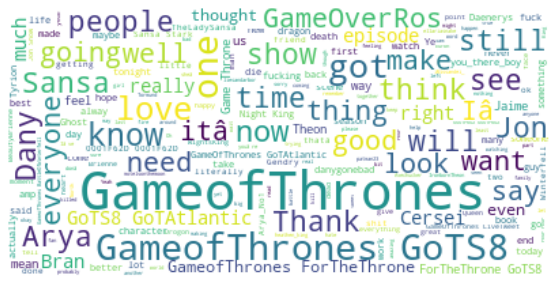

In [44]:
# Display the generated image
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentiment Analysis

In [60]:
sent_tweets = pd.DataFrame(df[['text','created_at','source']])

In [62]:
# Append the polarity scores
sid = SentimentIntensityAnalyzer()
sent_list = []
for index, row in tweets.iterrows():
    ss = sid.polarity_scores(row["text"])
    sent_list.append(ss)
sent_tweets['polarity'] = pd.Series(sent_list).values

In [63]:
sent_tweets = pd.concat([sent_tweets,sent_tweets.polarity.apply(pd.Series)],axis=1)

In [66]:
sent_tweets.sample(n=3)

,text,created_at,source,polarity,neg,neu,pos,compound
2286,Let it be fear...\r\n\r\n#GameOfThrones #ForTh...,2019-05-13 20:51,Twitter for Android,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
30646,@LordBranRaven Welcome to the chaos!,2019-05-20,Twitter for Android,"{'neg': 0.4, 'neu': 0.3, 'pos': 0.3, 'compound...",0.400,0.300,0.300,-0.2481
5106,@GameOverRos I saw it as Luke venturing into t...,2019-05-14 7:06,Twitter for Android,"{'neg': 0.159, 'neu': 0.709, 'pos': 0.131, 'co...",0.159,0.709,0.131,-0.4135


# EDA I 
- Episode by episode sentiments (dates from IMDB)

In [58]:
def pseudo_date(df,date1,date2,ep_name):
    df.loc[(df['created_at']>=date1) &
           (df['created_at']<date2),'created_date_pseudo'] = '%s' %(ep_name)
    return df

In [67]:
sent_tweets['created_date_pseudo'] = 'Pre Episode 1'
sent_tweets = pseudo_date(sent_tweets,'2019-04-14','2019-04-21','S8 Episode 1')
sent_tweets = pseudo_date(sent_tweets,'2019-04-21','2019-04-28','S8 Episode 2')
sent_tweets = pseudo_date(sent_tweets,'2019-04-28','2019-05-05','S8 Episode 3')
sent_tweets = pseudo_date(sent_tweets,'2019-05-05','2019-05-12','S8 Episode 4')
sent_tweets = pseudo_date(sent_tweets,'2019-05-12','2019-05-19','S8 Episode 5')
sent_tweets = pseudo_date(sent_tweets,'2019-05-19','2019-05-26','S8 Episode 6')

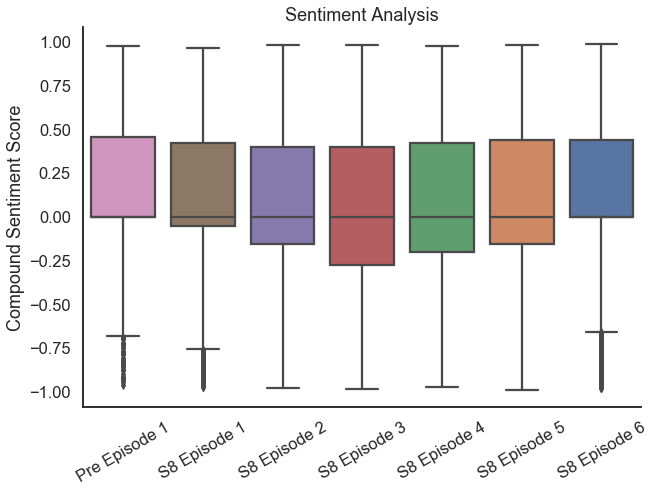

In [74]:
sns.set_context("talk")
sns.set_style("white")
plt.figure(figsize=(10,7))
ax = sns.boxplot(x="created_date_pseudo", y="compound",data=sent_tweets)
ax.invert_xaxis()
ax.set(xlabel='', ylabel='Compound Sentiment Score',
       title='Sentiment Analysis')
locs, labels = plt.xticks()
plt.setp(labels, rotation=30)
sns.despine()
plt.show()

In [75]:
sent_tweets['Tweet Source'] = 'Other'
sent_tweets.loc[sent_tweets['source']=='Twitter for Android','Tweet Source'] = 'Android'
sent_tweets.loc[sent_tweets['source']=='Twitter for iPhone','Tweet Source'] = 'iPhone'
sent_tweets.loc[(sent_tweets['source']=='Twitter Web Client') |
           (sent_tweets['source']=='Twitter Web App'), 'Tweet Source'] = 'Web'

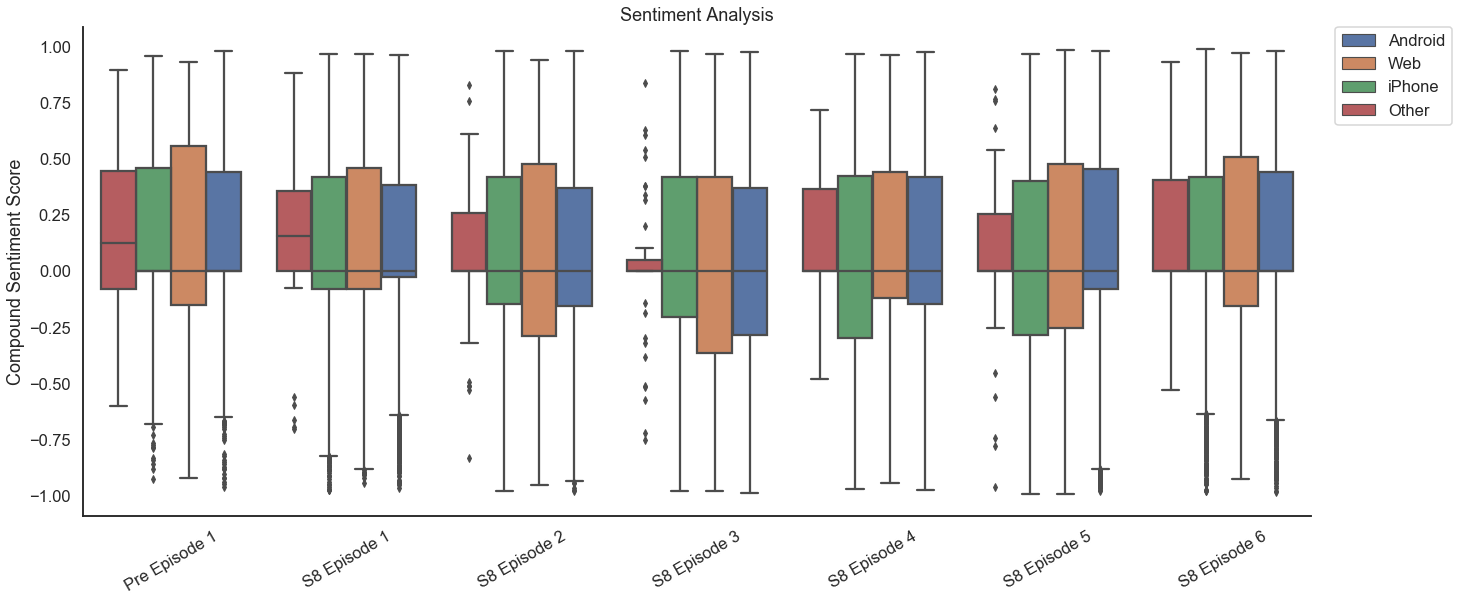

In [76]:
sns.set_context("talk")
sns.set_style("white")
plt.figure(figsize=(22,9))
ax = sns.boxplot(x="created_date_pseudo", y="compound",
                 hue='Tweet Source',data=sent_tweets)
ax.invert_xaxis()
ax.set(xlabel='', ylabel='Compound Sentiment Score',
       title='Sentiment Analysis')
locs, labels = plt.xticks()
plt.setp(labels, rotation=30)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.show()

# Follower Count Influence

In [77]:
df_combine = pd.concat([df,sent_tweets.iloc[:,3:]],axis=1)

In [78]:
df_fci = df_combine[['user_id','favorite_count','favourites_count','followers_count','compound']]

In [81]:
infl = df_fci.groupby(['user_id']).agg({'followers_count':'mean',
                                        'compound':'mean'}).sort_values(by=['followers_count'],
                                                                                    ascending=False)

In [84]:
infl['follower_count_bin'] = pd.qcut(infl['followers_count'], 5, labels=False)

In [86]:
infl = infl.reset_index().rename(columns={'compound':'mean_compound'})

In [87]:
infl.sample(n=3)

,user_id,followers_count,mean_compound,follower_count_bin
24,x172724945,2139.420058,0.048273,2
34,x750065186380406785,1163.664234,0.211086,1
17,x770395989551099904,5021.925221,0.239193,3


In [88]:
infl_bins = infl.groupby(['follower_count_bin'])['mean_compound'].mean().reset_index().sort_values(by=['mean_compound'],
                                                                               ascending=False)

In [89]:
infl_bins

,follower_count_bin,mean_compound
1,1,0.120791
2,2,0.081728
3,3,0.071778
0,0,0.059381
4,4,0.039114


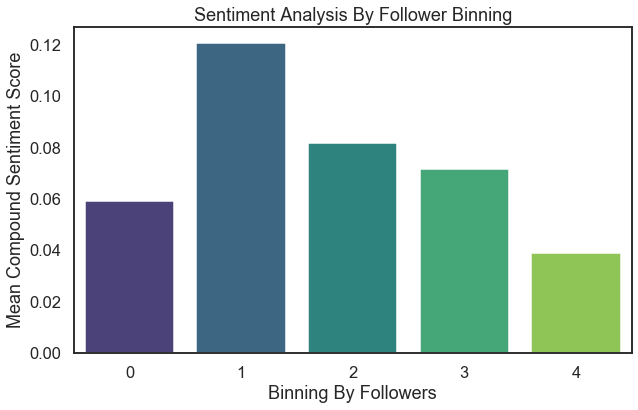

In [110]:
sns.set_context("talk")
plt.figure(figsize=(10,6))
ax = sns.barplot(x="follower_count_bin", y="mean_compound", data=infl_bins,
                palette='viridis')
ax.set(xlabel='Binning By Followers', ylabel='Mean Compound Sentiment Score',
       title='Sentiment Analysis By Follower Binning')
plt.show()